# What Makes a Star - With Supervised Learning 

NBA players are often classified into different categories; prospect, role player, veteran, star, and superstar. There is a distinct, intangible quality that distinguishes stars. Could that special attribute be their stats? Maybe leadership and team success? Popularity? Or maybe it is something else entirely. We will see.      

In [16]:
import pandas as pd, numpy as np, sklearn as sklm
import matplotlib.pyplot as plt, seaborn as sns 
pd.set_option('display.max_columns', None) 

import sqlalchemy, sqlite3   
from sklearn.linear_model import LogisticRegression, LinearRegression 

In [17]:
def combine_dfs(dfs):
    master = dfs[0]
    for i in range(1, len(dfs)):
        cols_new = dfs[i].columns.difference(master.columns).tolist() 
        cols_new.append('Player') 
        master = pd.merge(master, dfs[i][cols_new], on="Player") 
    return master 

In [18]:
db_path = "sqlite:///../../DB/ballbase.db" 

engine = sqlalchemy.create_engine(db_path) 

avg_2023_24 = pd.read_sql("averages_2023_24", con=engine) 
# total_2023_24 = pd.read_sql("totals_2023_24", con=engine)
per100_2023_24 = pd.read_sql("per100_2023_24", con=engine) 
adv_2023_24 = pd.read_sql("advanced_2023_24", con=engine)

dfs = [avg_2023_24, per100_2023_24, adv_2023_24] 

master = combine_dfs(dfs).drop('Tm', axis=1)
master

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,DRtg,ORtg,3PAr,AST%,BLK%,BPM,DBPM,DRB%,DWS,FTr,OBPM,ORB%,OWS,PER,STL%,TOV%,TRB%,TS%,USG%,VORP,WS,WS/48
0,Precious Achiuwa,PF-C,24,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,112,114.0,0.207,8.4,3.9,-1.4,0.3,20.5,2.2,0.239,-1.7,13.0,1.2,14.6,1.4,13.8,16.7,0.545,15.9,0.2,3.4,0.102
1,Bam Adebayo,C,26,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,109,115.0,0.041,18.9,2.7,2.4,1.7,27.3,4.3,0.381,0.8,7.4,2.9,19.8,1.7,12.0,17.3,0.576,24.9,2.7,7.2,0.144
2,Ochai Agbaji,SG,23,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,121,102.0,0.487,6.6,2.4,-4.4,-0.9,9.6,0.6,0.129,-3.5,4.9,-0.5,7.7,1.4,12.3,7.2,0.497,13.4,-1.0,0.1,0.002
3,Santi Aldama,PF,23,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,114,109.0,0.535,13.3,3.1,-0.2,0.4,19.7,2.0,0.153,-0.7,4.7,0.4,13.1,1.3,10.2,11.9,0.539,17.9,0.7,2.4,0.070
4,Nickeil Alexander-Walker,SG,25,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,111,115.0,0.623,14.5,1.9,0.2,1.3,7.5,2.8,0.121,-1.1,2.2,1.5,10.9,1.6,11.8,4.9,0.578,14.8,1.1,4.3,0.107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,33,6,13.3,2.0,3.3,0.602,0.0,0.2,0.143,1.9,3.1,0.634,0.606,0.2,0.5,0.400,1.4,1.7,3.1,1.7,0.7,0.2,0.5,1.5,4.2,116,130.0,0.065,17.9,1.0,0.3,0.8,14.5,0.4,0.139,-0.5,11.7,0.9,15.9,2.5,11.6,13.0,0.598,12.6,0.2,1.3,0.138
568,Trae Young,PG,25,54,54,36.0,8.0,18.7,0.430,3.2,8.7,0.373,4.8,10.0,0.479,0.516,6.4,7.5,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,122,117.0,0.465,45.1,0.5,2.6,-2.3,7.3,0.6,0.404,4.9,1.2,4.0,20.3,1.8,16.5,4.2,0.585,30.5,2.2,4.6,0.114
569,Omer Yurtseven,C,25,48,12,11.4,2.1,3.8,0.538,0.1,0.5,0.208,2.0,3.3,0.588,0.552,0.4,0.6,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,118,112.0,0.130,7.7,2.9,-3.0,-1.5,27.3,0.4,0.152,-1.6,14.7,0.3,15.0,0.7,15.9,21.0,0.565,17.9,-0.1,0.7,0.062
570,Cody Zeller,C,31,43,0,7.4,0.6,1.4,0.419,0.0,0.1,0.333,0.6,1.4,0.424,0.427,0.5,0.9,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,112,119.0,0.048,15.2,1.5,-2.6,0.3,22.0,0.4,0.613,-2.9,16.9,0.4,12.8,1.4,16.9,19.5,0.483,12.9,0.0,0.8,0.124


In [19]:
allstar = pd.read_sql('allstars_2023_24', con=engine)
allstar
allstars = allstar[allstar['Starters'] != "Team Totals"]['Starters'].tolist()
print(allstars) 

master['AS'] = master['Player'].isin(allstars)
print(master.to_string())


['Damian Lillard', 'Tyrese Haliburton', 'Giannis Antetokounmpo', 'Jayson Tatum', 'Bam Adebayo', 'Jaylen Brown', 'Paolo Banchero', 'Scottie Barnes', 'Jalen Brunson', 'Tyrese Maxey', 'Donovan Mitchell', 'Trae Young', 'Shai Gilgeous-Alexander', 'Kevin Durant', 'Nikola Jokić', 'Luka Dončić', 'LeBron James', 'Karl-Anthony Towns', 'Stephen Curry', 'Anthony Davis', 'Devin Booker', 'Anthony Edwards', 'Kawhi Leonard', 'Paul George']
                       Player    Pos  Age   G  GS    MP    FG   FGA    FG%   3P   3PA    3P%    2P   2PA    2P%   eFG%    FT   FTA    FT%  ORB   DRB   TRB   AST  STL  BLK  TOV   PF   PTS  DRtg   ORtg   3PAr  AST%  BLK%   BPM  DBPM  DRB%  DWS    FTr  OBPM  ORB%   OWS   PER  STL%  TOV%  TRB%    TS%  USG%  VORP    WS  WS/48     AS
0            Precious Achiuwa   PF-C   24  74  18  21.9   3.2   6.3  0.501  0.4   1.3  0.268   2.8   5.0  0.562  0.529   0.9   1.5  0.616  2.6   4.0   6.6   1.3  0.6  0.9  1.1  1.9   7.6   112  114.0  0.207   8.4   3.9  -1.4   0.3  20.5  2.2 

In [20]:
X = master.loc[:, 'Age':'WS/48'].fillna(0)
X
y = master['AS']
y
X_train, X_test, y_train, y_test = sklm.model_selection.train_test_split(X, y, test_size=0.2, random_state=1) 

lr = LogisticRegression(fit_intercept=True, solver='lbfgs') 
lr.fit(X_train, y_train)

train_accuracy = sklm.metrics.accuracy_score(y_train, lr.predict(X_train))
print(f"Train Accuracy: {train_accuracy}") 

test_accuracy = sklm.metrics.accuracy_score(y_test, lr.predict(X_test))
print(f"Test Accuracy {test_accuracy}") 


Train Accuracy: 0.9912472647702407
Test Accuracy 0.9739130434782609


C:\Users\bchan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
players = pd.concat([master[['Player']], X], axis=1).set_index('Player')
lr.predict([players.loc["Tyrese Haliburton"]])[0]

master2 = master 

predictions = lr.predict(master.loc[:, 'Age' : 'WS/48'].fillna(0)) 
predictions

master2['AS_Pred'] = predictions
master2['Accurate'] = master['AS_Pred'] == master2['AS']
master2[master2['Accurate']==False]


,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,DRtg,ORtg,3PAr,AST%,BLK%,BPM,DBPM,DRB%,DWS,FTr,OBPM,ORB%,OWS,PER,STL%,TOV%,TRB%,TS%,USG%,VORP,WS,WS/48,AS,AS_Pred,Accurate
1,Bam Adebayo,C,26,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,109,115.0,0.041,18.9,2.7,2.4,1.7,27.3,4.3,0.381,0.8,7.4,2.9,19.8,1.7,12.0,17.3,0.576,24.9,2.7,7.2,0.144,True,False,False
29,Scottie Barnes,SG,22,60,60,34.9,7.5,15.7,0.475,1.7,4.9,0.341,5.8,10.8,0.536,0.528,3.3,4.2,0.781,2.4,5.9,8.2,6.1,1.3,1.5,2.8,2.0,19.9,116,114.0,0.314,26.2,3.7,3.7,0.8,18.9,2.0,0.266,2.9,7.3,2.3,19.5,1.7,13.6,13.0,0.566,24.8,3.0,4.3,0.098,True,False,False
119,DeMar DeRozan,SF,34,79,79,37.8,8.2,17.2,0.480,0.9,2.8,0.333,7.3,14.3,0.509,0.507,6.6,7.7,0.853,0.5,3.8,4.3,5.3,1.1,0.6,1.7,2.0,24.0,118,122.0,0.166,21.8,1.5,1.8,-0.3,11.3,2.2,0.452,2.1,1.6,7.0,19.7,1.5,7.7,6.4,0.584,25.8,2.8,9.2,0.147,False,True,False
142,Joel Embiid,C,29,39,39,33.6,11.5,21.8,0.529,1.4,3.6,0.388,10.2,18.3,0.556,0.561,10.2,11.6,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,109,124.0,0.163,32.4,4.6,11.6,3.1,28.8,2.3,0.531,8.5,7.9,5.2,34.1,1.7,12.5,18.1,0.644,39.6,4.5,7.5,0.275,False,True,False
154,De'Aaron Fox,PG,26,74,74,35.9,9.7,20.9,0.465,2.9,7.8,0.369,6.8,13.1,0.522,0.534,4.2,5.7,0.738,0.9,3.7,4.6,5.6,2.0,0.4,2.6,2.6,26.6,114,113.0,0.374,25.2,1.1,2.7,0.1,11.8,3.2,0.273,2.6,2.8,3.3,20.1,2.7,10.1,7.2,0.567,31.0,3.2,6.5,0.117,False,True,False
195,Tyrese Haliburton,PG,23,69,68,32.2,7.2,15.2,0.477,2.8,7.8,0.364,4.4,7.4,0.595,0.570,2.8,3.3,0.855,0.5,3.4,3.9,10.9,1.2,0.7,2.3,1.1,20.1,119,129.0,0.510,44.9,1.7,6.9,-0.4,12.0,1.5,0.217,7.3,1.8,7.6,23.3,1.8,12.2,6.9,0.605,24.6,5.0,9.0,0.195,True,False,False
568,Trae Young,PG,25,54,54,36.0,8.0,18.7,0.430,3.2,8.7,0.373,4.8,10.0,0.479,0.516,6.4,7.5,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,122,117.0,0.465,45.1,0.5,2.6,-2.3,7.3,0.6,0.404,4.9,1.2,4.0,20.3,1.8,16.5,4.2,0.585,30.5,2.2,4.6,0.114,True,False,False


<BarContainer object of 10 artists>

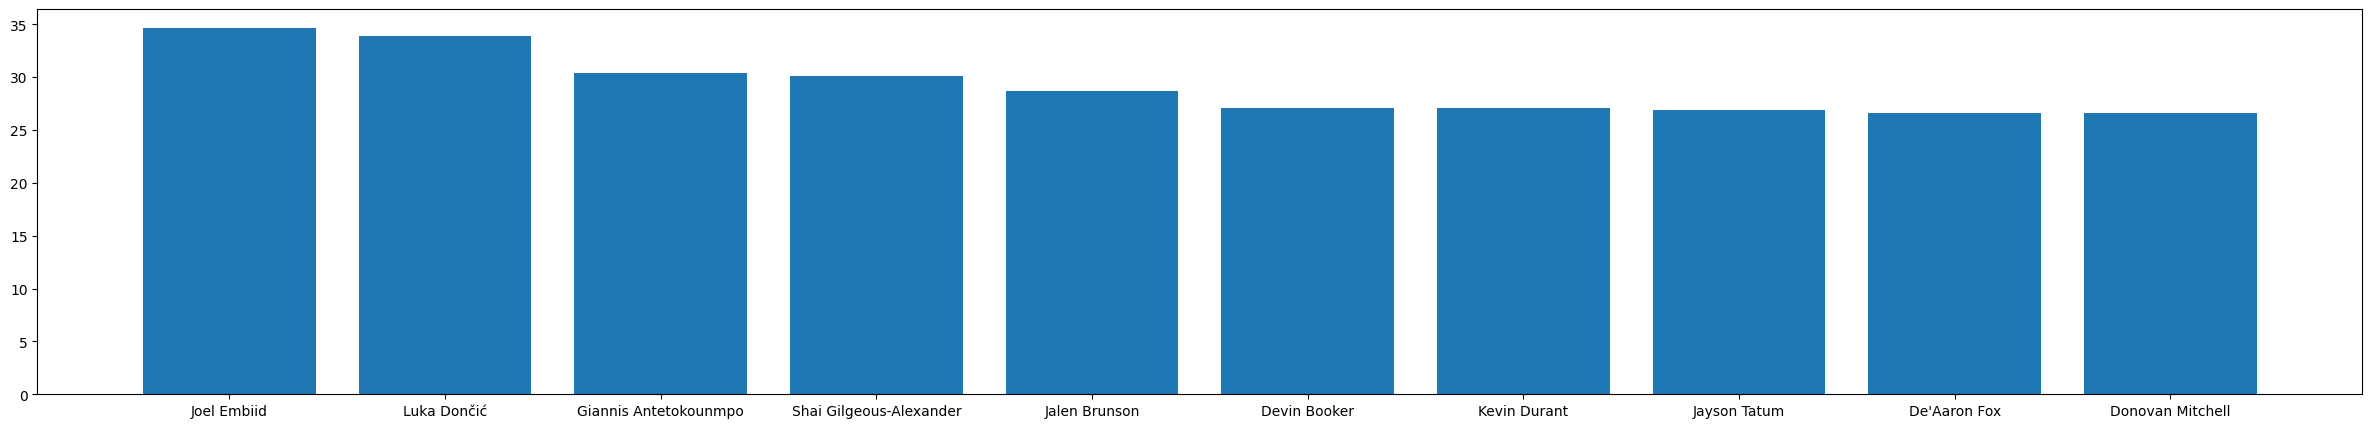

In [22]:
temp = master.sort_values(by='PTS', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(30, 5))
plt.bar(temp['Player'], temp['PTS'])

C:\Users\bchan\AppData\Local\Temp\ipykernel_10252\2992281061.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(player, (temp2['AST'][i]+0.1, temp2['PTS'][i]+0.1), size=9)


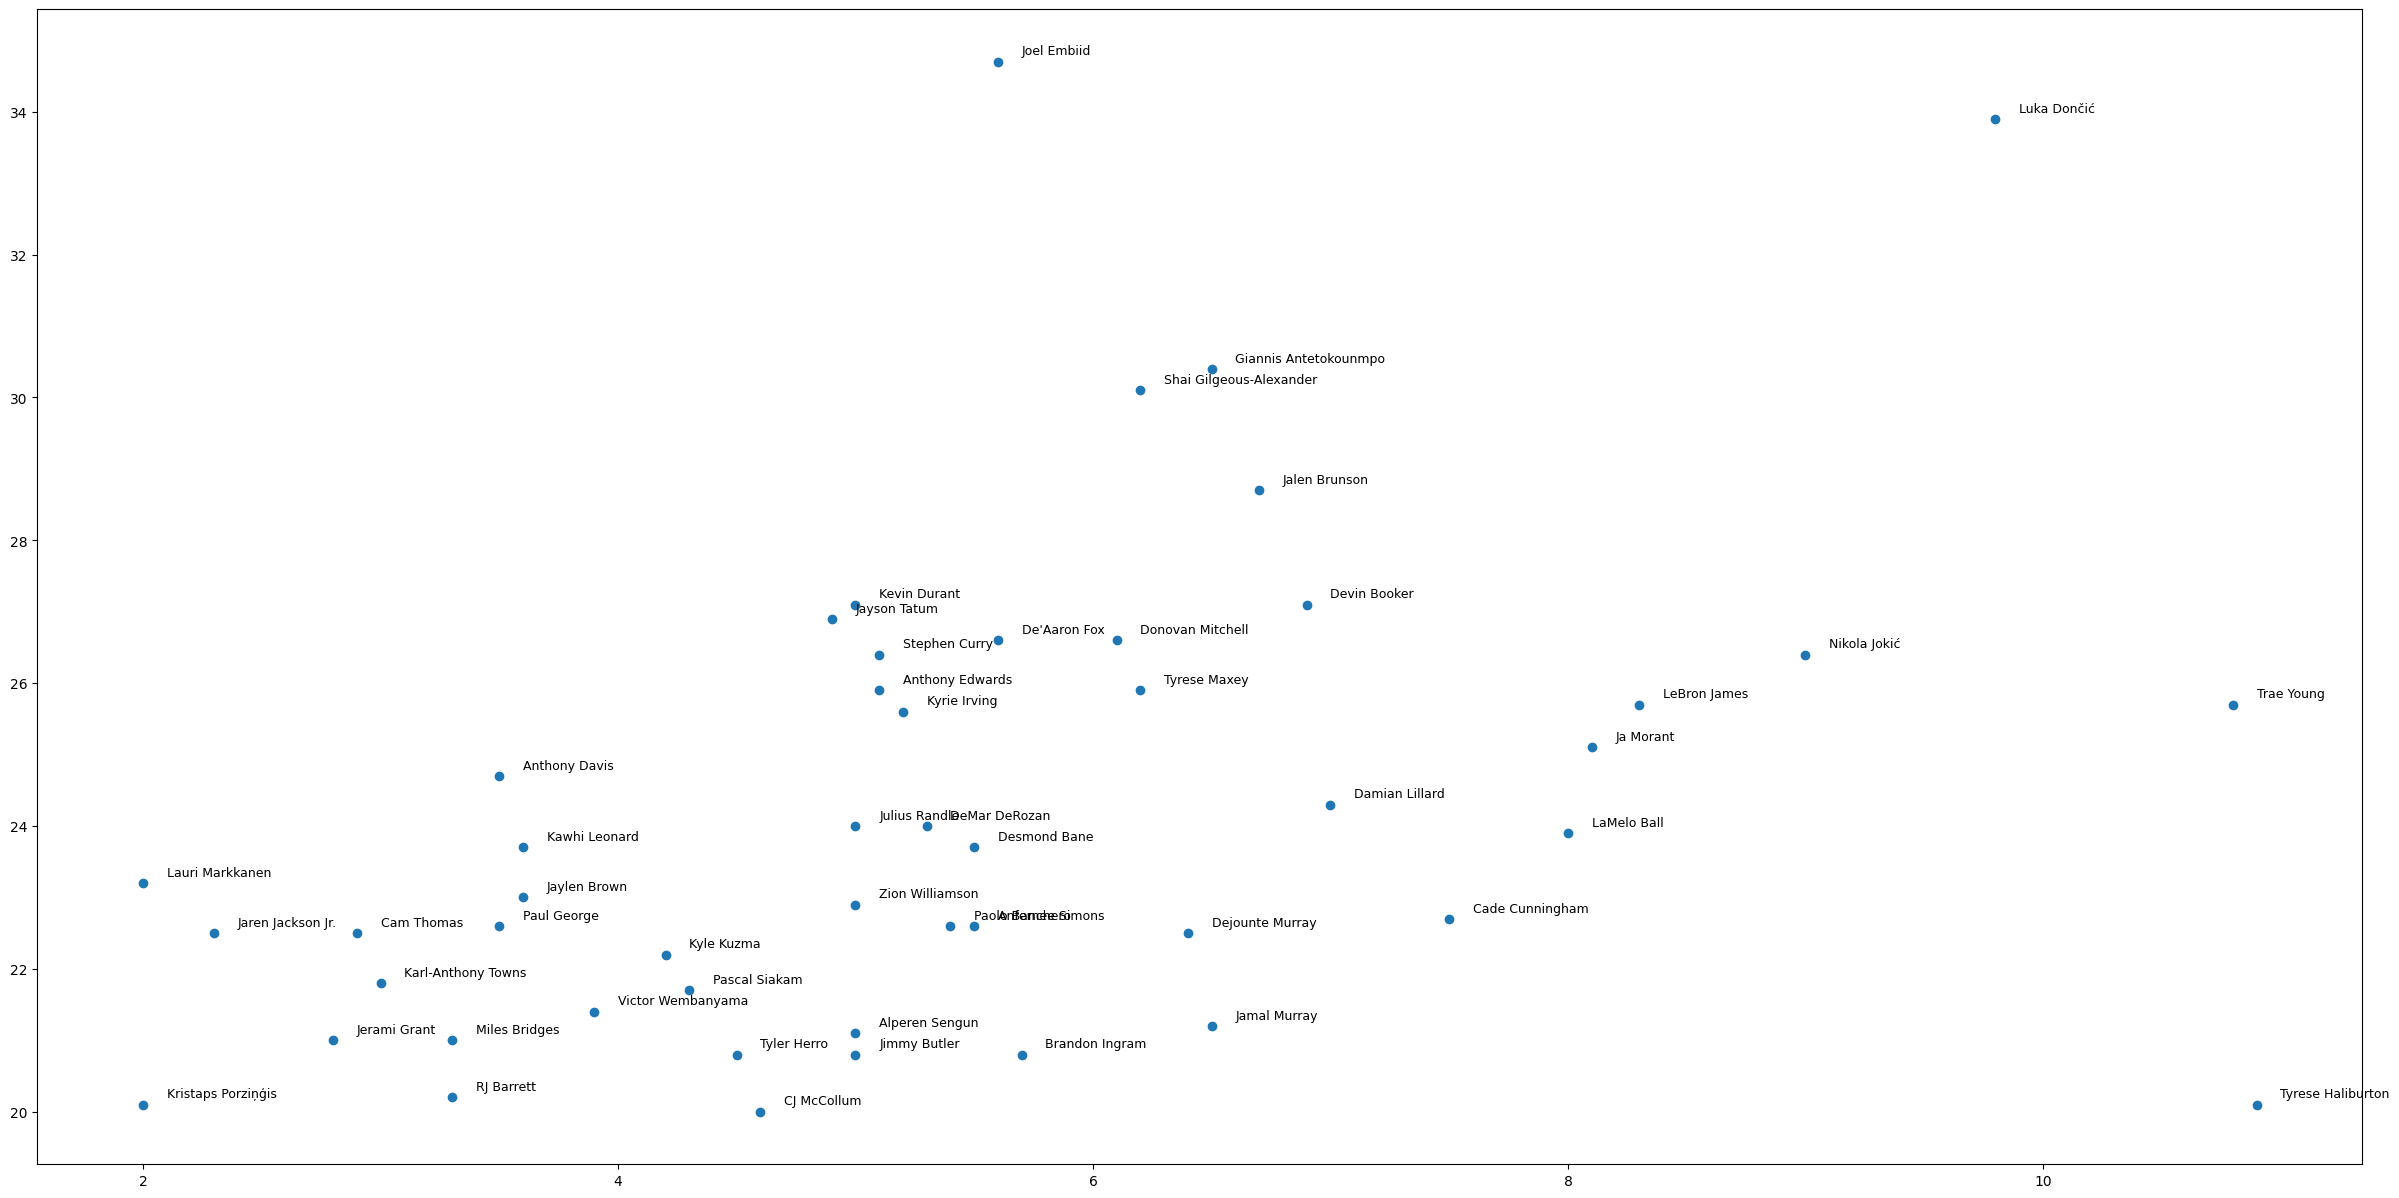

In [51]:
temp2 = master.sort_values(by='PTS', ascending=False).head(50) .set_index('Player') 


    
fig, ax = plt.subplots(figsize=(30, 15))
plt.scatter(temp2['AST'], temp2['PTS']) 

for i, player in enumerate(temp2.index):
    plt.annotate(player, (temp2['AST'][i]+0.1, temp2['PTS'][i]+0.1), size=9)

plt.show() 

C:\Users\bchan\AppData\Local\Temp\ipykernel_10252\2976721515.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(player, (temp2['PTS'][i]+0.1, temp2['AST'][i]+0.1), size=9)


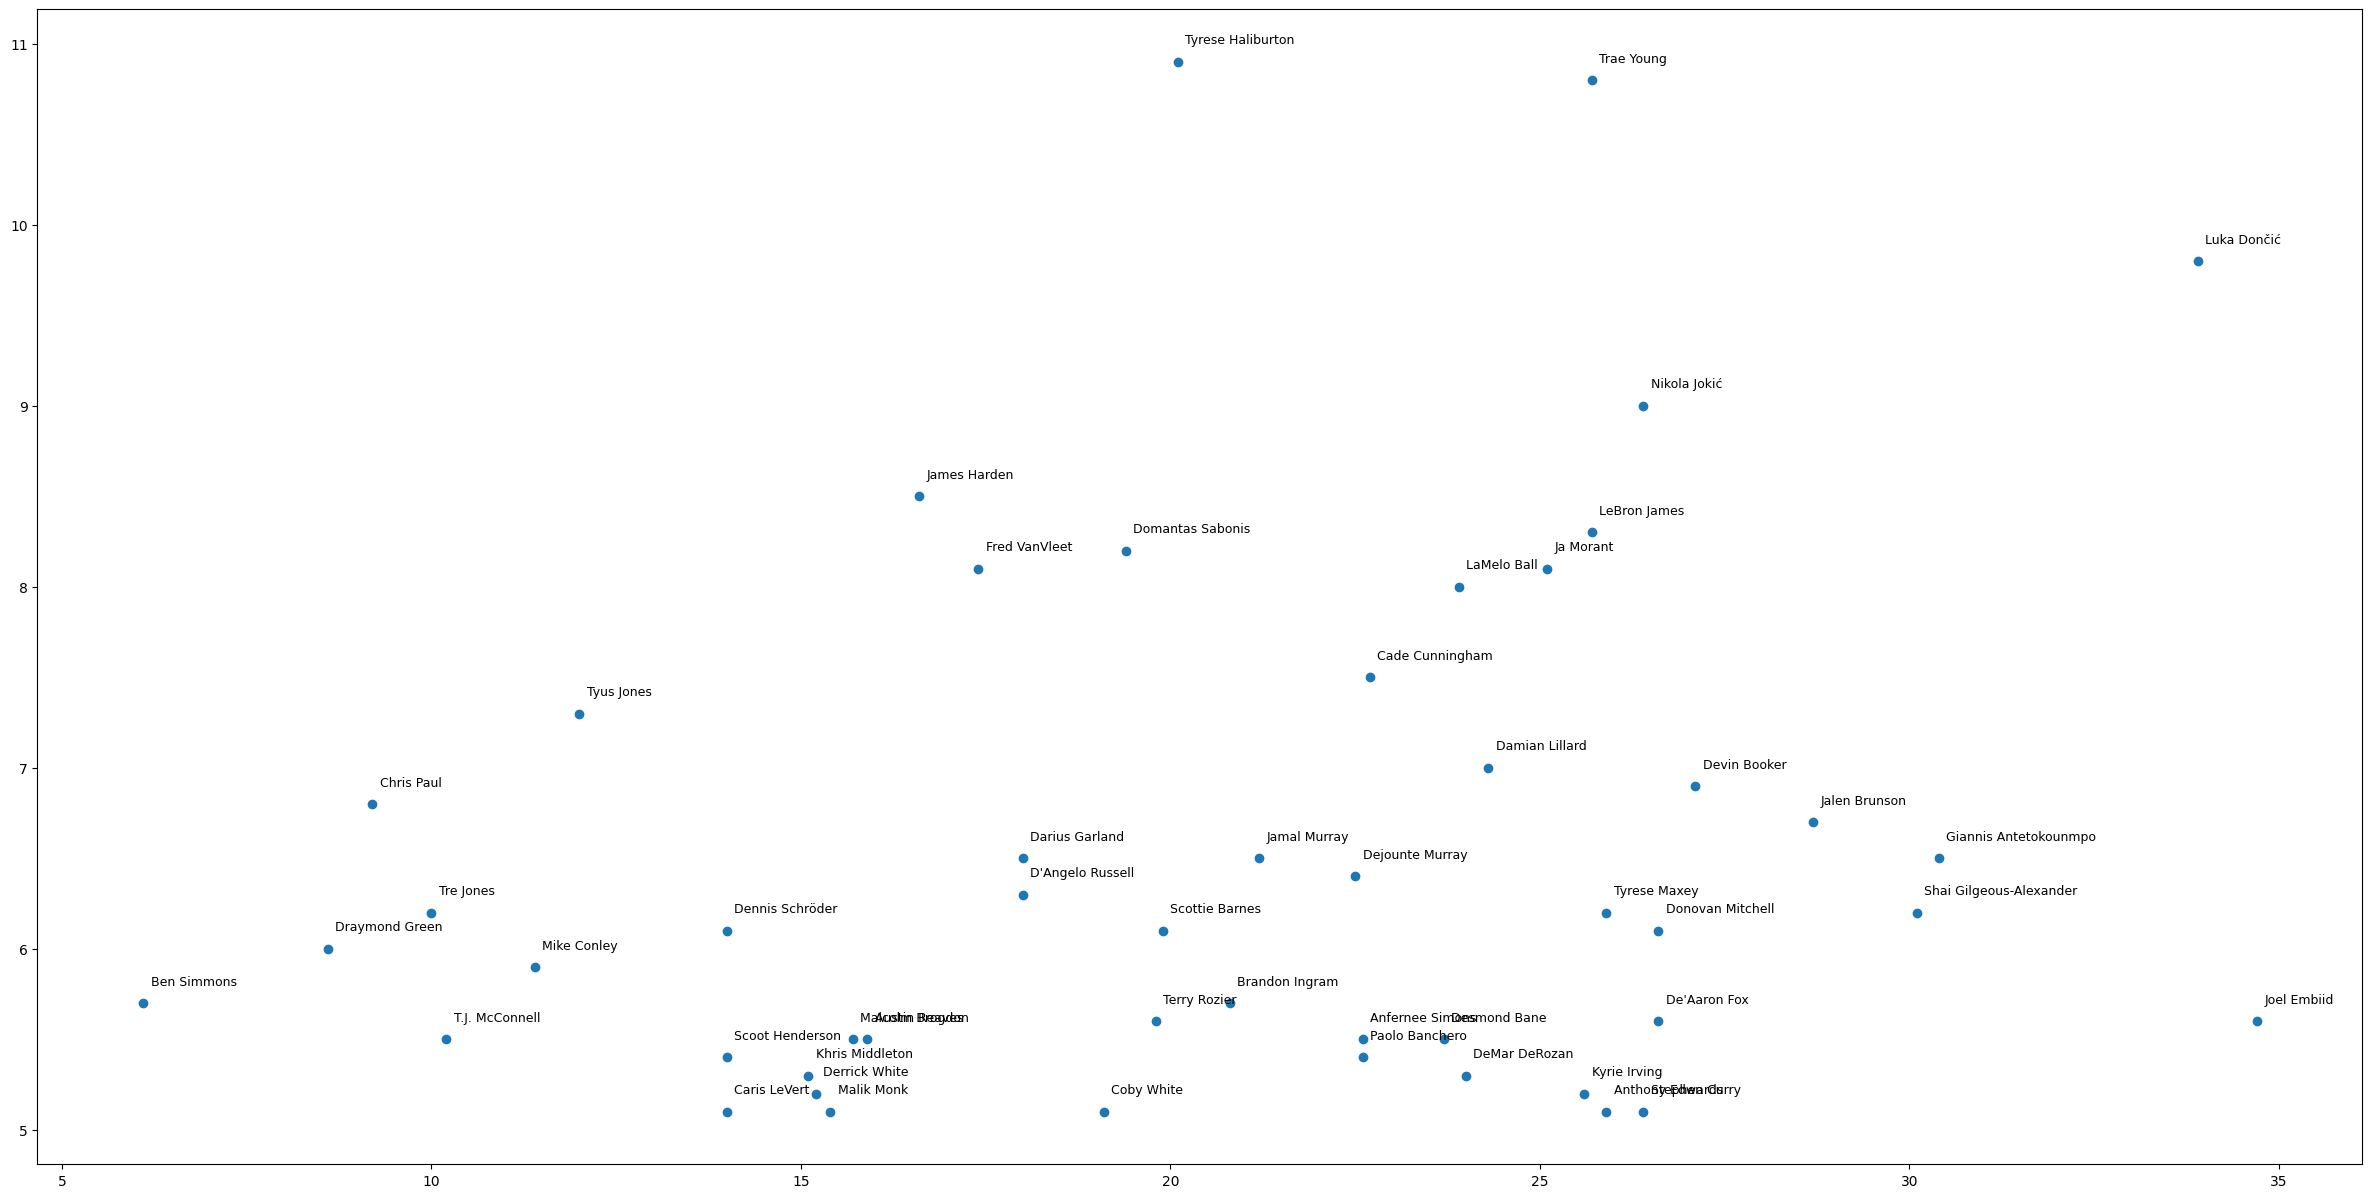

In [54]:
temp2 = master.sort_values(by='AST', ascending=False).head(50) .set_index('Player') 


    
fig, ax = plt.subplots(figsize=(30, 15))
plt.scatter(temp2['PTS'], temp2['AST']) 

for i, player in enumerate(temp2.index):
    plt.annotate(player, (temp2['PTS'][i]+0.1, temp2['AST'][i]+0.1), size=9)

plt.show() 